<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [145]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [146]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']


df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [147]:
df['species'].replace({"nan": 'default'})
df['species']=df['species'].str.lower().str.strip()
pd.DataFrame(df["species"].value_counts())

,species
setosa,50
virginica,50
versicolor,49


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

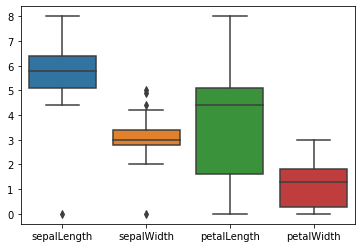

In [148]:
for cols in df.columns[:-1]:
    df.loc[df[cols].isnull(),cols] = 0
        
df2 = df.drop(['species'], axis=1)
sns.boxplot(data=df2)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [170]:
label0=list()
for i in range(0,len(df)):
    if (4.0>df['sepalLength'][i] or 7.0<df['sepalLength'][i]) or  (2>df['sepalWidth'][i] or 4.5<df['sepalWidth'][i]) or (1.0>df['petalLength'][i] or 7.0<df['petalLength'][i] ) or (0.1>df['petalWidth'][i] or  2.5<df['petalWidth'][i]) :
        label0.append("Fuera de rango")
    else:
        label0.append("Dentro de rango")
    
label1=pd.DataFrame(label0)
df=df.assign(label=label1)

4. Realice un gráfico de sepalLength vs petalLength y otro de sepalWidth vs petalWidth categorizados por la etiqueta label. Concluya sus resultados.

<function matplotlib.pyplot.show(*args, **kw)>

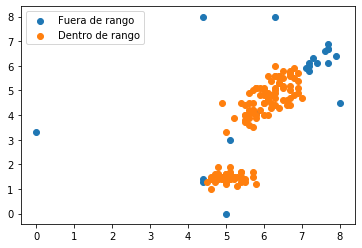

In [175]:
fig, ax=plt.subplots()
for label in df['label'].unique():
    x_1=df.loc[df['label']==label,'sepalLength']
    y_1=df.loc[df['label']==label,'petalLength']
    ax.scatter(x_1,y_1,label=label)

ax.legend()


plt.show

<function matplotlib.pyplot.show(*args, **kw)>

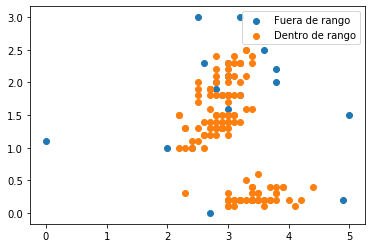

In [178]:
fig, ax=plt.subplots()
for label in df['label'].unique():
    x_2=df.loc[df['label']==label,'sepalWidth']
    y_2=df.loc[df['label']==label,'petalWidth']
    ax.scatter(x_2,y_2,label=label)
ax.legend()


plt.show

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

Text(0, 0.5, 'petalLength')

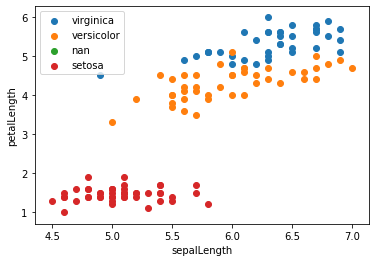

In [183]:
df_a=df.loc[df['label']=='Dentro de rango']
fig,ax=plt.subplots()
for specie in df_a['species'].unique():
    x_1=df_a.loc[df_a['species']==specie,'sepalLength']
    y_1=df_a.loc[df_a['species']==specie,'petalLength']
    ax.scatter(x_1,y_1,label=specie)
ax.legend()
plt.xlabel('sepalLength')
plt.ylabel('petalLength')
        